<a href="https://colab.research.google.com/github/SteveWong-a/COSMOS-ratplacecelldata/blob/main/PlaceCellsSVM_ordinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import drive

# --- 1. Mount Google Drive ---
# This allows your Colab notebook to access files stored in your Google Drive.
# You will be prompted to authorize this access.
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Drive mounted successfully.")

# --- 2. Define File Path ---
# The path to your MODIFIED .npy file within Google Drive.
source_path = '/content/drive/My Drive/placedata.npy'

# --- 3. Load and Process Data ---
print(f"\nAttempting to load data from: {source_path}")

try:
    # Load the .npy file.
    # allow_pickle=True is necessary for loading object arrays, like dictionaries.
    # .item() is used to extract the dictionary object that was saved into the file.
    loaded_data = np.load(source_path, allow_pickle=True).item()
    print("File loaded successfully.")

    # --- 4. Extract Variables from the Dictionary ---
    # We extract each variable by using its name as a key in the loaded dictionary.
    # Note that we are now using 'RLtesttgt' as the key.
    LRtrain = loaded_data['LRtrain']
    LRtest = loaded_data['LRtest']
    RLtest = loaded_data['RLtest']
    LRtraintgt = loaded_data['LRtraintgt']
    LRtesttgt = loaded_data['LRtesttgt']
    RLtesttgt = loaded_data['RLtesttgt'] # <-- Using the new, renamed variable

    print("\nSuccessfully extracted all variables. Shapes:")
    print(f"  LRtrain:    {LRtrain.shape}")
    print(f"  LRtest:     {LRtest.shape}")
    print(f"  RLtest:     {RLtest.shape}")
    print(f"  LRtraintgt: {LRtraintgt.shape}")
    print(f"  LRtesttgt:  {LRtesttgt.shape}")
    print(f"  RLtesttgt:  {RLtesttgt.shape}") # <-- Updated variable name

    # --- 5. Find and Print Unique Labels ---
    # The np.unique() function returns the sorted unique elements of an array.
    print("\n" + "="*40)
    print("Analyzing unique labels in target vectors...")
    print("="*40)

    unique_train_labels = np.unique(LRtraintgt)
    print(f"Unique labels in LRtraintgt: {unique_train_labels}")

    unique_test_lr_labels = np.unique(LRtesttgt)
    print(f"Unique labels in LRtesttgt:  {unique_test_lr_labels}")

    unique_test_rl_labels = np.unique(RLtesttgt) # <-- Using the new, renamed variable
    print(f"Unique labels in RLtesttgt:   {unique_test_rl_labels}") # <-- Updated label
    print("="*40)


# --- Error Handling ---
except FileNotFoundError:
    print(f"\n[ERROR] File Not Found: The file could not be found at '{source_path}'.")
    print("Please ensure that 'placedata_modified.npy' exists in the root of your 'My Drive'.")

except KeyError as e:
    print(f"\n[ERROR] Missing Data: The file was loaded, but a required variable key was not found: {e}.")
    print("Please check the script that created 'placedata_modified.npy' to ensure all 6 variables were saved correctly with the new names.")

except Exception as e:
    print(f"\n[ERROR] An unexpected error occurred: {e}")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted successfully.

Attempting to load data from: /content/drive/My Drive/placedata.npy
File loaded successfully.

Successfully extracted all variables. Shapes:
  LRtrain:    (359, 916)
  LRtest:     (359, 904)
  RLtest:     (359, 1003)
  LRtraintgt: (916,)
  LRtesttgt:  (904,)
  RLtesttgt:  (1003,)

Analyzing unique labels in target vectors...
Unique labels in LRtraintgt: [0.         0.04545455 0.09090909 0.13636364 0.18181818 0.22727273
 0.27272727 0.31818182 0.36363636 0.40909091 0.45454545 0.5
 0.54545455 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727
 0.81818182 0.86363636 0.90909091 0.95454545 1.        ]
Unique labels in LRtesttgt:  [0.         0.04545455 0.09090909 0.13636364 0.18181818 0.22727273
 0.27272727 0.31818182 0.36363636 0.40909091 0.45454545 0.5
 0.54545455 0.59090909 0.63636364 0.68181818 0.7272727

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted successfully.
File loaded successfully.
Epoch 01:
  Train -> Acc: 0.048, MSE: 0.2575
  LRtest -> Acc: 0.056, MSE: 0.2045
  RLtest -> Acc: 0.054, MSE: 0.2435
Epoch 02:
  Train -> Acc: 0.052, MSE: 0.2540
  LRtest -> Acc: 0.081, MSE: 0.1713
  RLtest -> Acc: 0.058, MSE: 0.2472
Epoch 03:
  Train -> Acc: 0.068, MSE: 0.2207
  LRtest -> Acc: 0.095, MSE: 0.1499
  RLtest -> Acc: 0.057, MSE: 0.2428
Epoch 04:
  Train -> Acc: 0.091, MSE: 0.1772
  LRtest -> Acc: 0.105, MSE: 0.1295
  RLtest -> Acc: 0.060, MSE: 0.2330
Epoch 05:
  Train -> Acc: 0.124, MSE: 0.1351
  LRtest -> Acc: 0.143, MSE: 0.1035
  RLtest -> Acc: 0.075, MSE: 0.2275
Epoch 06:
  Train -> Acc: 0.180, MSE: 0.1046
  LRtest -> Acc: 0.170, MSE: 0.0855
  RLtest -> Acc: 0.084, MSE: 0.2183
Epoch 07:
  Train -> Acc: 0.235, MSE: 0.0775
  LRtest -> Acc: 0.189, MSE: 0.0725
  RLtest 

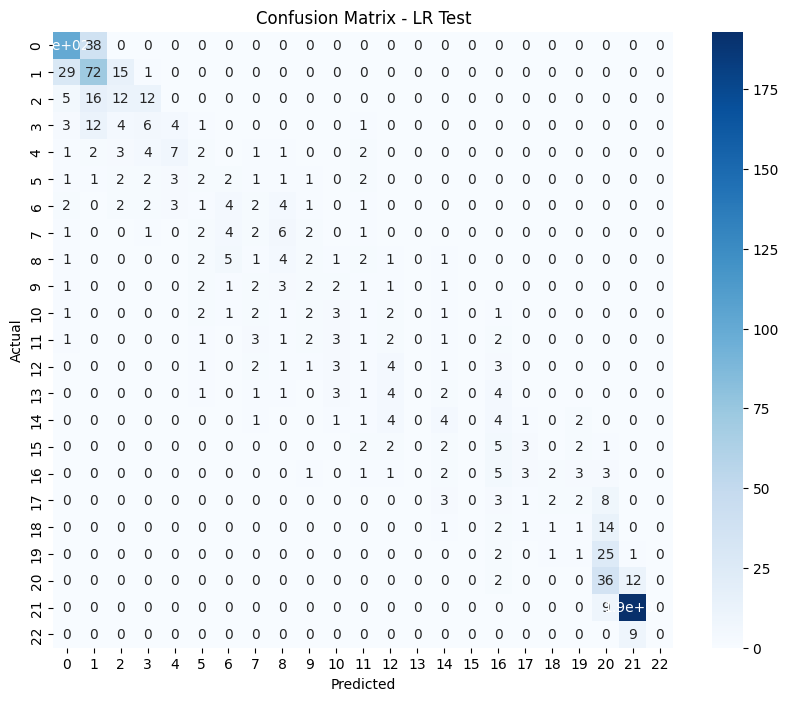

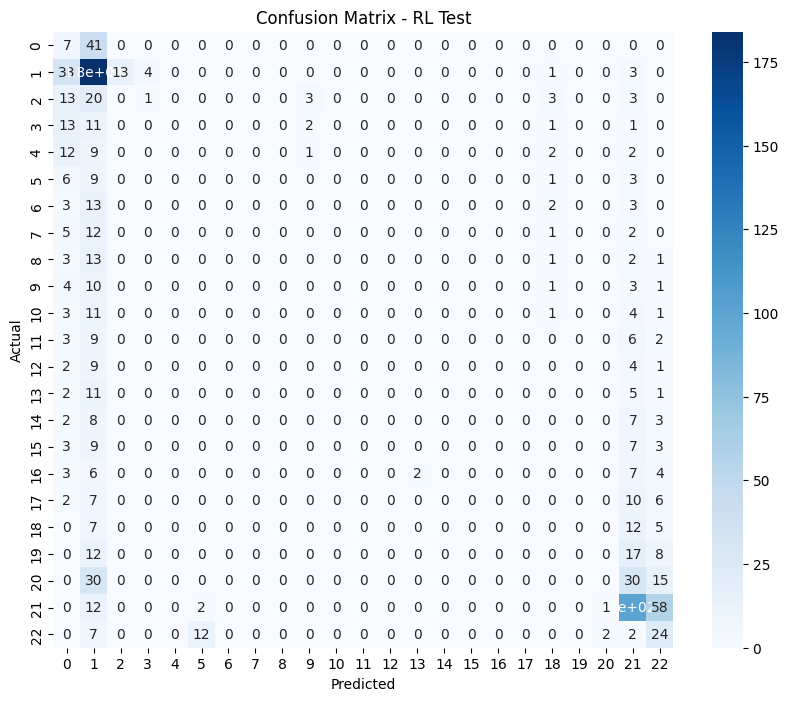


=== Final Results ===
Train Accuracy:      0.650
Train MSE:           0.0019
LR Test Accuracy:    0.510
LR Test MSE:         0.0068
RL Test Accuracy:    0.315
RL Test MSE:         0.1238


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Mount Google Drive ===
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Drive mounted successfully.")

# === 2. Load Data ===
source_path = '/content/drive/My Drive/placedata.npy'
loaded_data = np.load(source_path, allow_pickle=True).item()
print("File loaded successfully.")

LRtrain = loaded_data['LRtrain'].T  # Shape (916, 359)
LRtraintgt = loaded_data['LRtraintgt']
LRtest = loaded_data['LRtest'].T
LRtesttgt = loaded_data['LRtesttgt']
RLtest = loaded_data['RLtest'].T
RLtesttgt = loaded_data['RLtesttgt']

# === 3. Normalize Place Cell Inputs ===
scaler = StandardScaler()
X_train = scaler.fit_transform(LRtrain)
X_test_lr = scaler.transform(LRtest)
X_test_rl = scaler.transform(RLtest)

# === 4. Discretize Targets for Classification ===
labels = np.unique(LRtraintgt)
def discretize(y): return np.searchsorted(labels, y)

y_train_cls = discretize(LRtraintgt)
y_test_lr_cls = discretize(LRtesttgt)
y_test_rl_cls = discretize(RLtesttgt)

# === 5. Convert to Torch Tensors ===
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_cls, dtype=torch.long)
X_test_lr_tensor = torch.tensor(X_test_lr, dtype=torch.float32)
y_test_lr_tensor = torch.tensor(y_test_lr_cls, dtype=torch.long)
X_test_rl_tensor = torch.tensor(X_test_rl, dtype=torch.float32)
y_test_rl_tensor = torch.tensor(y_test_rl_cls, dtype=torch.long)

# === 6. Define Linear Classifier ===
class SVMClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)

model = SVMClassifier(input_dim=359, num_classes=len(labels))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# === 7. Training Loop ===
epochs = 50
for epoch in range(1, epochs + 1):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        pred_train = torch.argmax(outputs, dim=1).numpy()
        acc_train = accuracy_score(y_train_cls, pred_train)
        mse_train = mean_squared_error(labels[pred_train], LRtraintgt)

        model.eval()
        lr_out = model(X_test_lr_tensor)
        pred_lr = torch.argmax(lr_out, dim=1).numpy()
        acc_lr = accuracy_score(y_test_lr_cls, pred_lr)
        mse_lr = mean_squared_error(labels[pred_lr], LRtesttgt)

        rl_out = model(X_test_rl_tensor)
        pred_rl = torch.argmax(rl_out, dim=1).numpy()
        acc_rl = accuracy_score(y_test_rl_cls, pred_rl)
        mse_rl = mean_squared_error(labels[pred_rl], RLtesttgt)

    print(f"Epoch {epoch:02d}:")
    print(f"  Train -> Acc: {acc_train:.3f}, MSE: {mse_train:.4f}")
    print(f"  LRtest -> Acc: {acc_lr:.3f}, MSE: {mse_lr:.4f}")
    print(f"  RLtest -> Acc: {acc_rl:.3f}, MSE: {mse_rl:.4f}")

# === 8. Confusion Matrices ===
def plot_conf_matrix(true, pred, title):
    cm = confusion_matrix(true, pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test_lr_cls, pred_lr, "Confusion Matrix - LR Test")
plot_conf_matrix(y_test_rl_cls, pred_rl, "Confusion Matrix - RL Test")

# === 9. Final Accuracy and MSE ===
print("\n=== Final Results ===")
print(f"Train Accuracy:      {accuracy_score(y_train_cls, pred_train):.3f}")
print(f"Train MSE:           {mean_squared_error(labels[pred_train], LRtraintgt):.4f}")
print(f"LR Test Accuracy:    {accuracy_score(y_test_lr_cls, pred_lr):.3f}")
print(f"LR Test MSE:         {mean_squared_error(labels[pred_lr], LRtesttgt):.4f}")
print(f"RL Test Accuracy:    {accuracy_score(y_test_rl_cls, pred_rl):.3f}")
print(f"RL Test MSE:         {mean_squared_error(labels[pred_rl], RLtesttgt):.4f}")